In [212]:
import numpy as np
import matplotlib.pyplot as plt

In [233]:
chain = np.load('../runs/chain_2_2.npy')

11.945763538888674 13.655111406588281


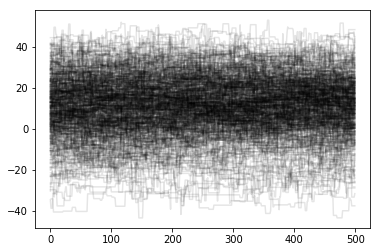

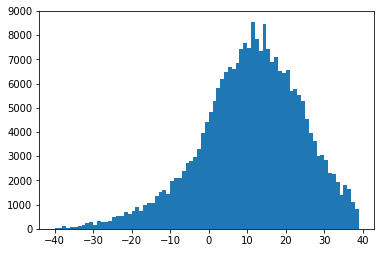

In [234]:
i = 6
clip = 2500
plt.plot(chain[0:,clip:,i].T, 'k', alpha=0.1)
print(np.median(chain[:,clip:,i]), np.std(chain[:,clip:,i]))
plt.show()

plt.hist(chain[:,clip:,i].flatten(), np.arange(-40, 40, 1))
plt.show()

In [216]:
sc = np.shape(chain)

In [237]:
clip = 2000
igburn = chain[:,clip:,:].flatten().reshape(sc[0]*(sc[1]-clip),sc[2])

si = np.shape(igburn)
rand = np.random.randint(0, si[0], 100)

In [238]:
rand

array([  7761, 187825, 168565, 342906, 323382, 378272,  23547, 272704,
       317055, 170973, 180371, 335329, 467170,  61760, 329397, 299492,
       433559, 301706, 450281,  71739, 365273, 222529, 255806, 124351,
        29927, 170368,  97017, 118522, 358814, 413505, 394374, 159390,
        72033, 238520, 340626, 488943, 336813, 253803, 493159, 489019,
       460264, 400185, 124297, 152894, 233355, 338847, 292033, 138075,
       370857,  51637, 192595, 133587,  90271, 441357,  68895, 147955,
       368442,  86125, 289075, 411700, 212524, 456644, 156039,  13743,
        67735, 488549,  19619, 450281, 337449, 189830,  39880, 428305,
        31100, 373299, 125146, 183864, 400584, 352196, 286580, 235269,
       378946,  83577, 141096, 194994, 355048,  69092, 223032, 237931,
       455743, 279120, 335895,   2003, 153969, 185167, 133892,  49393,
       364262, 188781, 265979,  36024])

In [239]:
import starry
time, vels, verr = np.loadtxt('../data/transit.vels', usecols=[0,1,2], unpack=True)
time -= 2458706.5
map = starry.Map(ydeg=4, udeg=2, rv=True, lazy=False)
map.reset()

Prot = 2.85             # days
P = 8.1387              # days
e = 0.0
w = 0.0
inc = 90.0

tuse = time + 0.0
euse = verr + 0.0
vuse = vels + 0.0

def rmcurve(tarr, params):

    vsini, r, b, a, u1, u2, obl, gamma, gammadot, gammadotdot, gamma3, gamma4, jitter_good, jitter_bad, q, factor, t0 = params
    veq = vsini / np.sin(inc * np.pi / 180.0)

    map.inc = inc
    map.obl = obl
    # map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
    map[1:] = [u1, u2]
    map.veq = veq

    f = (tarr - t0) / P * 2 * np.pi
    I = np.arccos(b / a)

    zo = a * np.cos(f)
    yo = -a * np.sin(np.pi / 2 + f) * np.cos(I)
    xo = a * np.sin(f) * np.sin(I)
    
    gamma3 = 0.0
    gamma4 = 0.0

    theta = 360.0 / Prot * tarr

    rv_0 = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
    trend = gamma + gammadot * (tarr - 0.15) + gammadotdot * (tarr - 0.15) ** 2 + gamma3*(tarr-0.15)**3 + gamma4*(tarr-0.15)**4
    rv = rv_0 + trend
    
    return rv, trend

In [240]:
tarr = np.arange(0, 0.5, 0.001)
rv_out = np.zeros((100, len(tarr)))
trend_out = np.zeros((100, len(tarr)))

for i in range(100):
    rv_out[i], trend_out[i] = rmcurve(tarr, igburn[rand[i]])

Compiling `rv`... Done.


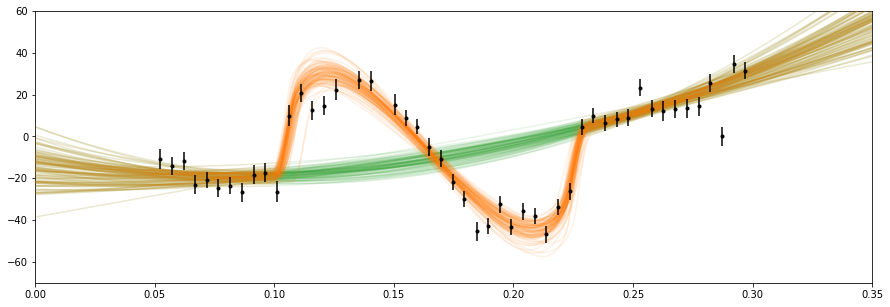

In [241]:
plt.figure(figsize=(15,5))

plt.plot(tarr, rv_out.T, 'C1', alpha=0.1, zorder=3)
plt.plot(tarr, trend_out.T, 'C2', alpha=0.1)

plt.errorbar(time, vels, yerr=verr, fmt='k.', zorder=5)

plt.ylim(-70, 60)
plt.xlim(0.0, 0.35)

plt.show()
